In [28]:
import numpy as np
from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import os
import pickle

## Load and Preparing the Data

In [2]:
# # Prepare data
# img2vec = Img2Vec()

# combined_dir = 'FinalPrJDataSet/TrafficSigns'

# X = []  # Features
# y = []  # Labels

# for category in os.listdir(combined_dir):
#     for img_path in os.listdir(os.path.join(combined_dir, category)):
#         img_path_ = os.path.join(combined_dir, category, img_path)
#         img = Image.open(img_path_)

#         img_features = img2vec.get_vec(img)

#         X.append(img_features)
#         y.append(category)
#     print(category)

# # Convert lists to NumPy arrays for easier manipulation
# X = np.array(X)
# y = np.array(y)

In [3]:
# # Save features to a NumPy binary file
# np.save('features.npy', X)

# # Save labels to a text file, one label per line
# with open('labels.txt', 'w') as f:
#     for label in y:
#         f.write(f"{label}\n")
# print(X)
# print(y)


In [26]:
# Load features
X = np.load('features.npy')

# Load labels
with open('labels.txt', 'r') as f:
    y = [line.strip() for line in f]

X = np.array(X)
y = np.array(y)

print(X)

print(y)


[[1.629626   2.725075   0.9717703  ... 1.2720879  0.37720045 0.12943146]
 [1.9254584  1.589767   0.71608436 ... 0.9402544  1.2152518  0.4448062 ]
 [2.2900367  1.1720458  0.4635447  ... 1.051961   0.68797004 0.46289134]
 ...
 [0.45311695 0.6448062  0.10645784 ... 0.071628   0.33590263 1.1184682 ]
 [0.9772739  0.13452353 0.00385451 ... 0.02894848 0.39161152 1.355104  ]
 [0.2969642  0.34131446 0.09722456 ... 0.07154339 0.2278309  0.82515585]]
['0' '0' '0' ... '9' '9' '9']


## Data Visvalization

## 1. Principal Component Analysis

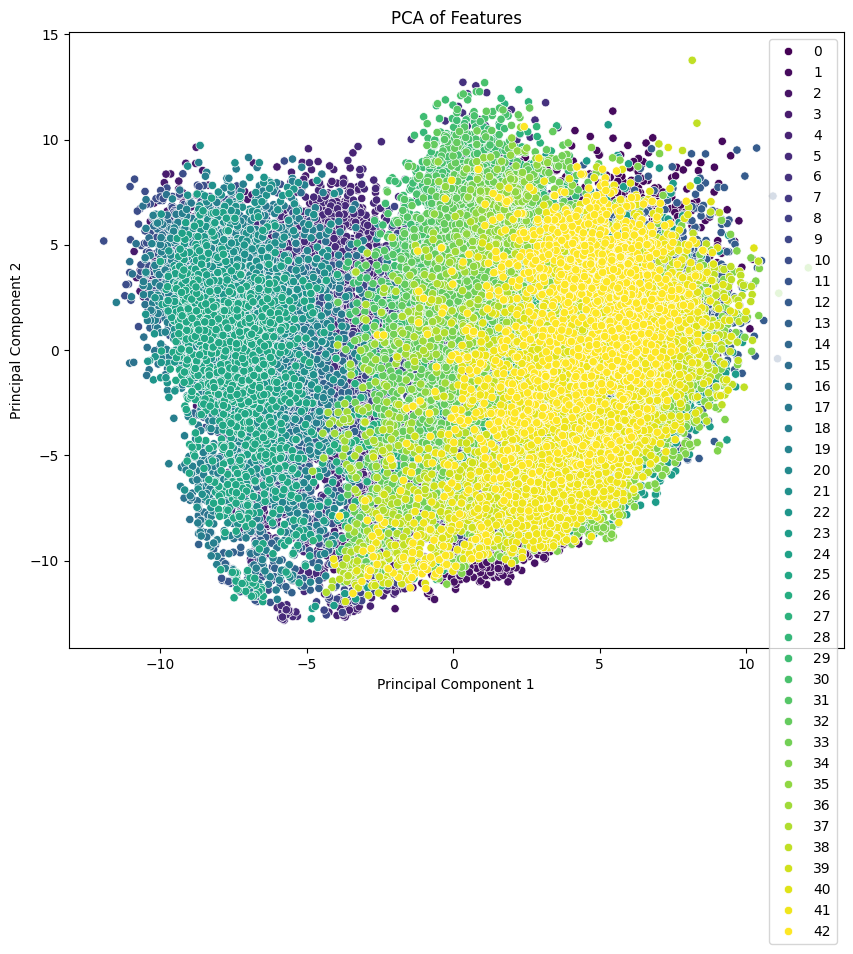

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Convert labels to numerical form if they're not already
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_numeric = le.fit_transform(y)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_numeric, palette='viridis', legend='full')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


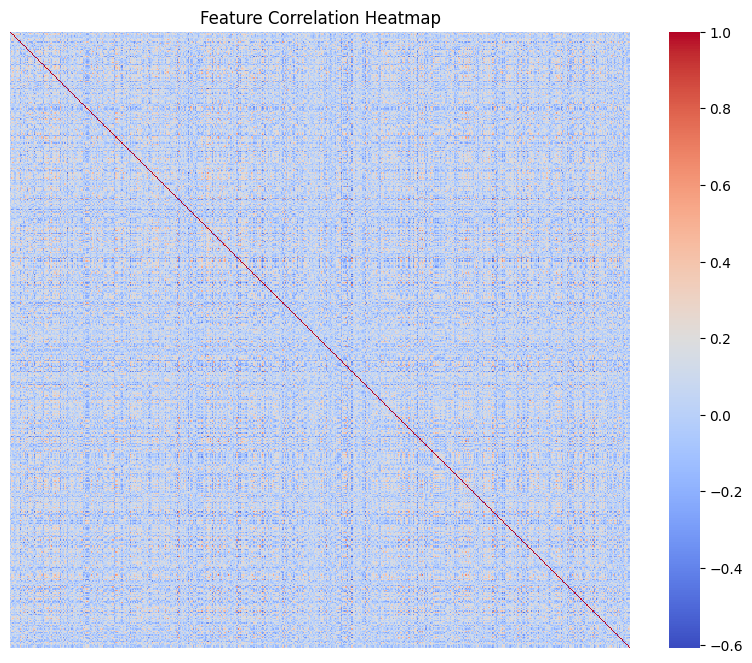

In [6]:
# Calculate correlations
corr = np.corrcoef(X.T)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Feature Correlation Heatmap')
plt.show()


## 2. Class Distribution

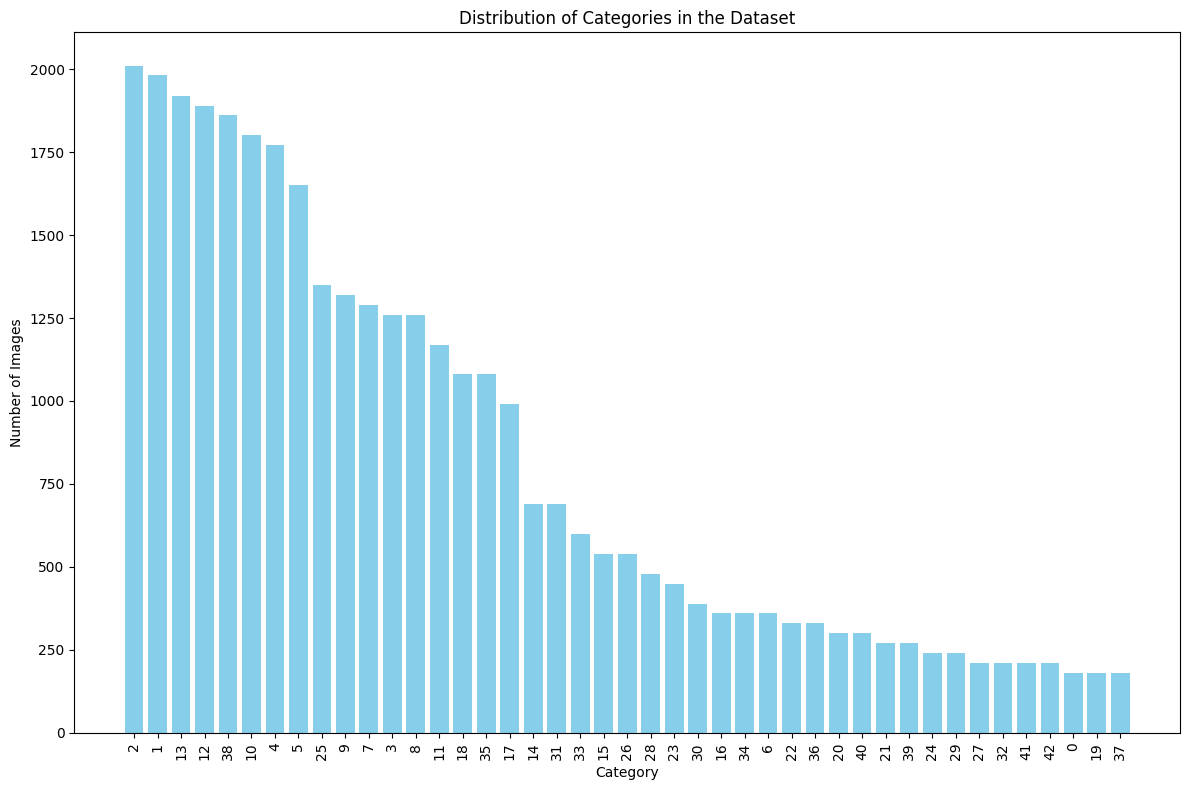

In [7]:
from collections import defaultdict
import matplotlib.pyplot as plt
import os

# Correct path to the dataset
dataset_dir = 'FinalPrJDataSet/TrafficSigns'

# Re-counting images in each category
category_counts = defaultdict(int)
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    category_counts[category] = len(os.listdir(category_path))

# Sorting categories for consistent visualization
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_categories)

# Plotting class distribution
plt.figure(figsize=(12, 8))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.title('Distribution of Categories in the Dataset')
plt.tight_layout()
plt.show()


## 3. Sample Images

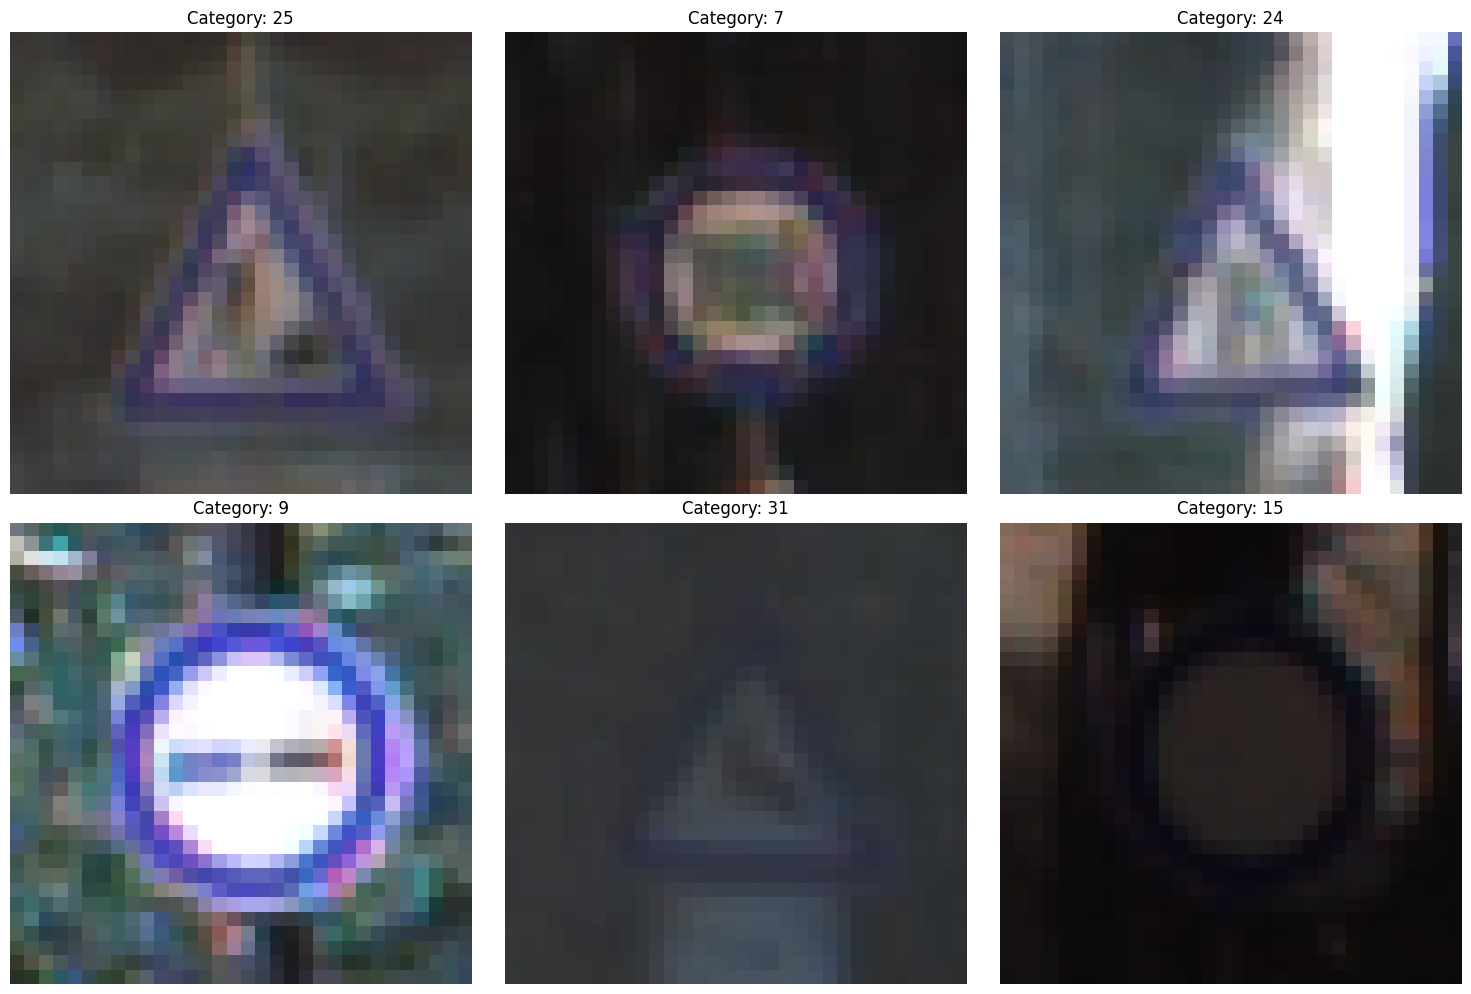

In [8]:
import random
from PIL import Image

# Randomly selecting a few categories
sample_categories = random.sample(list(categories), 6)

# Displaying one image from each of the selected categories
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, category in zip(axs.flatten(), sample_categories):
    category_path = os.path.join(dataset_dir, category)
    sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
    img = Image.open(sample_image_path)
    ax.imshow(img)
    ax.set_title(f"Category: {category}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Classification

## 1. Decision Tree

In [9]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
0.5323397915770596
# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)

# Perform cross-validation
dt_results = cross_validate(dt_classifier, X_scaled, y, cv=kf, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

print(f"Decision Tree Classifier - Accuracy: {np.mean(dt_results['test_accuracy']):.3f}")

Decision Tree Classifier - Accuracy: 0.592


In [10]:
dt_results_mean = {metric: np.mean(scores) for metric, scores in dt_results.items() if 'test_' in metric}
dt_results_mean

{'test_accuracy': 0.5922875074533434,
 'test_precision_macro': 0.5323397915770596,
 'test_recall_macro': 0.531293503523684,
 'test_f1_macro': 0.5305864282673546}

## 2. RandomForestClassifier

In [12]:
rf_classifier = RandomForestClassifier()
scaler = StandardScaler()
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)
# K-Fold Cross-Validation
rf_results = cross_validate(rf_classifier, X_scaled, y, cv=kf, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

print(f"Random Forest Classifier - Accuracy: {np.mean(rf_results['test_accuracy']):.3f}")


Random Forest Classifier - Accuracy: 0.909


In [19]:
rf_results_mean = {metric: np.mean(scores) for metric, scores in rf_results.items() if 'test_' in metric}
rf_results_mean

{'test_accuracy': 0.9088479650101663,
 'test_precision_macro': 0.9492875212874591,
 'test_recall_macro': 0.8565246132232017,
 'test_f1_macro': 0.8920393585430325}

## 3. Gaussian Naive Bayes

In [14]:
# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

scaler = StandardScaler()
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)


# Perform cross-validation
gnb_results = cross_validate(gnb_classifier, X_scaled, y, cv=kf, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

print(f"Gaussian Naive Bayes - Accuracy: {np.mean(gnb_results['test_accuracy']):.3f}")

Gaussian Naive Bayes - Accuracy: 0.706


In [20]:
gnb_results_mean = {metric: np.mean(scores) for metric, scores in gnb_results.items() if 'test_' in metric}
gnb_results_mean

{'test_accuracy': 0.7058822611255084,
 'test_precision_macro': 0.7084470555904423,
 'test_recall_macro': 0.7460277971289814,
 'test_f1_macro': 0.7127742466405882}

## 4. Multi-Layer Perceptron classifier

In [15]:
mlp_classifier = MLPClassifier(max_iter=1000)
# Initialize the StandardScaler
scaler = StandardScaler()
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)
mlp_results = cross_validate(mlp_classifier, X_scaled, y, cv=kf, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

print(f"MLP Classifier - Accuracy: {np.mean(mlp_results['test_accuracy']):.3f}")


MLP Classifier - Accuracy: 0.965


In [21]:
MLP_results_mean = {metric: np.mean(scores) for metric, scores in mlp_results.items() if 'test_' in metric}
MLP_results_mean

{'test_accuracy': 0.9649705045810189,
 'test_precision_macro': 0.9685388333968126,
 'test_recall_macro': 0.9638676076396185,
 'test_f1_macro': 0.9657094471384191}

## 5. Support Vector Classifier

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire dataset and transform it
X_scaled = scaler.fit_transform(X)

# Initialize the SVC with 'gamma='auto''
svc_classifier = SVC(gamma='auto', random_state=42)

# K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# Perform cross-validation
svc_results = cross_validate(svc_classifier, X_scaled, y, cv=kf, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)

print(f"SVC - Accuracy:", svc_results)

SVC - Accuracy: {'fit_time': array([82.52544546, 82.09168863, 82.40481043, 83.27839184, 83.97563434]), 'score_time': array([81.81528401, 81.8961153 , 82.35799837, 82.65603685, 82.34458661]), 'test_accuracy': array([0.98045977, 0.9816092 , 0.98204023, 0.98204023, 0.98246875]), 'test_precision_macro': array([0.98572089, 0.98916012, 0.98794772, 0.98826004, 0.98765091]), 'test_recall_macro': array([0.98194075, 0.98277896, 0.98225531, 0.98237183, 0.98198558]), 'test_f1_macro': array([0.98365033, 0.98583138, 0.9849699 , 0.98523356, 0.98467363])}


In [17]:
print(f"SVC Classifier - Accuracy: {np.mean(svc_results['test_accuracy']):.3f}")

SVC Classifier - Accuracy: 0.982


In [22]:
svc_results_mean = {metric: np.mean(scores) for metric, scores in svc_results.items() if 'test_' in metric}
svc_results_mean

{'test_accuracy': 0.9817236341593537,
 'test_precision_macro': 0.9877479370557675,
 'test_recall_macro': 0.9822664867694346,
 'test_f1_macro': 0.9848717594574119}

## Comparison

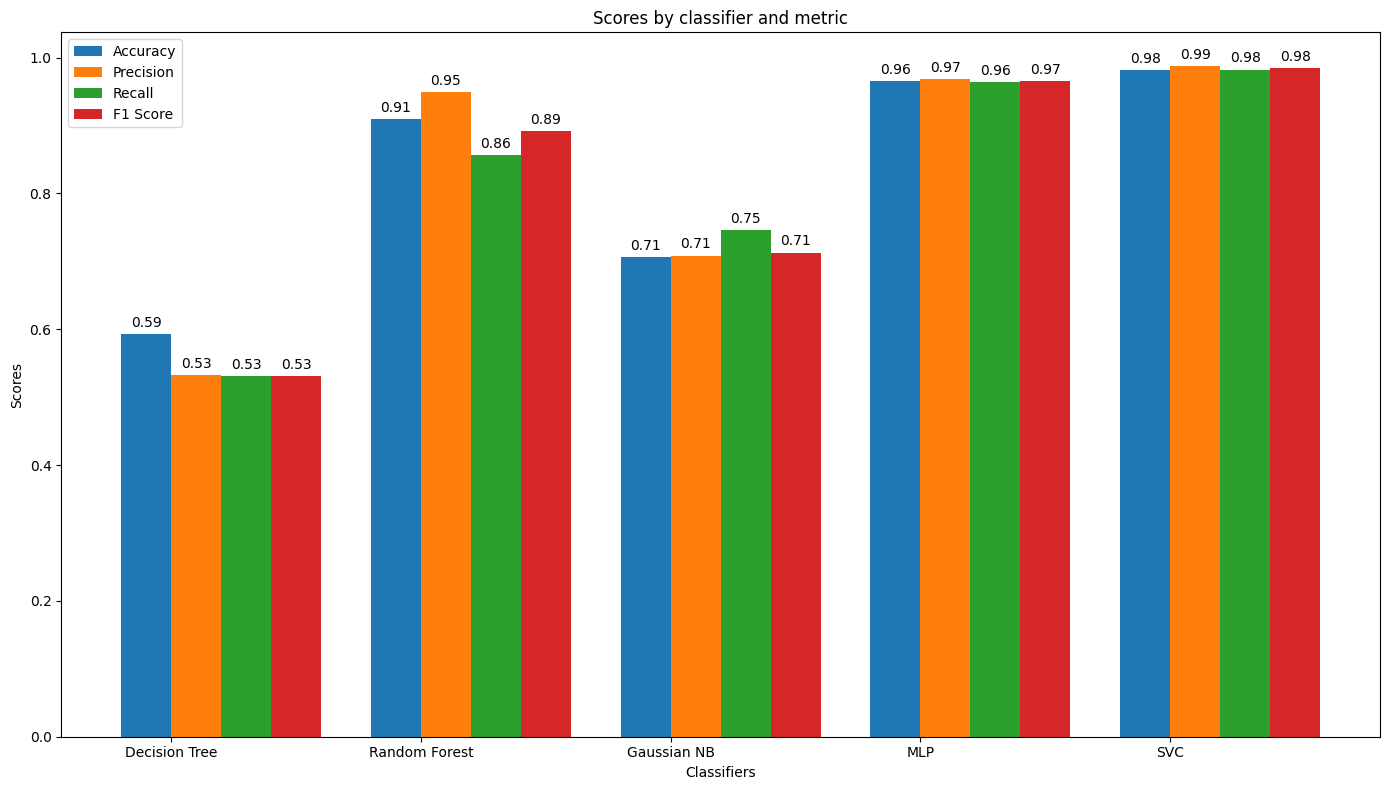

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['Decision Tree', 'Random Forest', 'Gaussian NB', 'MLP', 'SVC']

# Assuming the results variables are collected as follows (the values are placeholders and should be replaced with actual results):
# Each classifier's metrics are a dictionary with keys: 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro'
dt_metrics = {'test_accuracy': np.mean(dt_results['test_accuracy']), 
              'test_precision_macro': np.mean(dt_results['test_precision_macro']),
              'test_recall_macro': np.mean(dt_results['test_recall_macro']),
              'test_f1_macro': np.mean(dt_results['test_f1_macro'])}

rf_metrics = {'test_accuracy': np.mean(rf_results['test_accuracy']), 
              'test_precision_macro': np.mean(rf_results['test_precision_macro']),
              'test_recall_macro': np.mean(rf_results['test_recall_macro']),
              'test_f1_macro': np.mean(rf_results['test_f1_macro'])}

gnb_metrics = {'test_accuracy': np.mean(gnb_results['test_accuracy']), 
               'test_precision_macro': np.mean(gnb_results['test_precision_macro']),
               'test_recall_macro': np.mean(gnb_results['test_recall_macro']),
               'test_f1_macro': np.mean(gnb_results['test_f1_macro'])}

mlp_metrics = {'test_accuracy': np.mean(mlp_results['test_accuracy']), 
               'test_precision_macro': np.mean(mlp_results['test_precision_macro']),
               'test_recall_macro': np.mean(mlp_results['test_recall_macro']),
               'test_f1_macro': np.mean(mlp_results['test_f1_macro'])}

svc_metrics = {'test_accuracy': np.mean(svc_results['test_accuracy']), 
               'test_precision_macro': np.mean(svc_results['test_precision_macro']),
               'test_recall_macro': np.mean(svc_results['test_recall_macro']),
               'test_f1_macro': np.mean(svc_results['test_f1_macro'])}

# Collecting all metrics for visualization
accuracy = [dt_metrics['test_accuracy'], rf_metrics['test_accuracy'], gnb_metrics['test_accuracy'], mlp_metrics['test_accuracy'], svc_metrics['test_accuracy']]
precision = [dt_metrics['test_precision_macro'], rf_metrics['test_precision_macro'], gnb_metrics['test_precision_macro'], mlp_metrics['test_precision_macro'], svc_metrics['test_precision_macro']]
recall = [dt_metrics['test_recall_macro'], rf_metrics['test_recall_macro'], gnb_metrics['test_recall_macro'], mlp_metrics['test_recall_macro'], svc_metrics['test_recall_macro']]
f1_score = [dt_metrics['test_f1_macro'], rf_metrics['test_f1_macro'], gnb_metrics['test_f1_macro'], mlp_metrics['test_f1_macro'], svc_metrics['test_f1_macro']]

x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width*1.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*2.5, f1_score, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Scores by classifier and metric')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Split the dataset (assuming this hasn't been done yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the Classifier
svc_classifier = SVC(gamma='auto',random_state=42)
svc_classifier.fit(X_train_scaled, y_train)

# 4. Test the Classifier
y_pred = svc_classifier.predict(X_test_scaled)

# 5. Obtain Results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.978
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      0.98      0.97       387
          10       0.99      0.99      0.99       390
          11       0.96      0.98      0.97       236
          12       1.00      1.00      1.00       372
          13       1.00      1.00      1.00       387
          14       1.00      1.00      1.00       146
          15       1.00      1.00      1.00       107
          16       1.00      0.97      0.99        79
          17       1.00      0.99      1.00       173
          18       1.00      0.99      0.99       226
          19       1.00      0.94      0.97        34
           2       0.95      0.96      0.96       411
          20       0.92      0.97      0.95        63
          21       1.00      0.93      0.96        43
          22       1.00      1.00      1.00        64
          23       0.98      0.99      0.98        83
          2

SyntaxError: 'return' outside function (1817149505.py, line 25)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Assuming X, y are your features and target labels

# 1. Split the dataset (assuming this hasn't been done yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Train the Classifier using StratifiedKFold
for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svc_classifier = SVC(gamma='auto', random_state=42)
    svc_classifier.fit(X_train_fold, y_train_fold)

    # 5. Test the Classifier on validation set
    y_val_pred = svc_classifier.predict(X_val_fold)

    # 6. Obtain Results for validation set
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.3f}")
    print(classification_report(y_val_fold, y_val_pred))

# Once model is trained, test on the test set
# 7. Test the Classifier on the test set
y_pred = svc_classifier.predict(X_test_scaled)

# 8. Obtain Results for test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))


In [72]:
with open('./model.p', 'wb') as f:
    pickle.dump(svc_classifier, f)
    f.close()